# Aplicando machine learning em uma situação de problema no coração

Com este dataset o intui é fazer se o modelo acerta quem tem mais propensão a ter problemas cardivasculares ou não.


In [27]:
# Importando os modulos
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

O dataset utilizado pode ser utilizado neste [link](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

In [28]:
# Importando o dataset
heart_failure = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [29]:
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Dicionário dos dados
- **age**: Idade
- **anaemia**: Diminuição de glóbulos vermelhos ou hemoglobina (booleano).
- **creatinine_phosphokinase**: nivel da enzima CPK no sangue (mcg/L)
- **diabetes** : Se o paciente ja teve diabetes (boleano).
- **ejection_fraction**: porcentagem do sangue que que está saindo do coração a cada contração (porcentagem).
- **high_blood_pressure**: se o paciente tem hipertensão (boleano).
- **platelets**: Platelets no sangue (kiloplatelets/mL).
- **serum_creatinine**: nivel de  serum creatinine no sangue (mg/dL).
- **serum_sodium**: nivel de serum sodio no sangue (mg/dL).
- **sex**: homem ou mulher (boleano).
- **smoking**: se fuma (boleano)
- **time**: periodo de acompanhamento (dias).
- **DEATH_EVENT**: Paciente faleceu durante o periode de acompanhamento (boleano).

In [30]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [31]:
heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


podemos ver que não nenhum valor nulo e olhando as 5 linhas acima vai ser preciso normalizar os dados pra coloca-los no mesmo peso


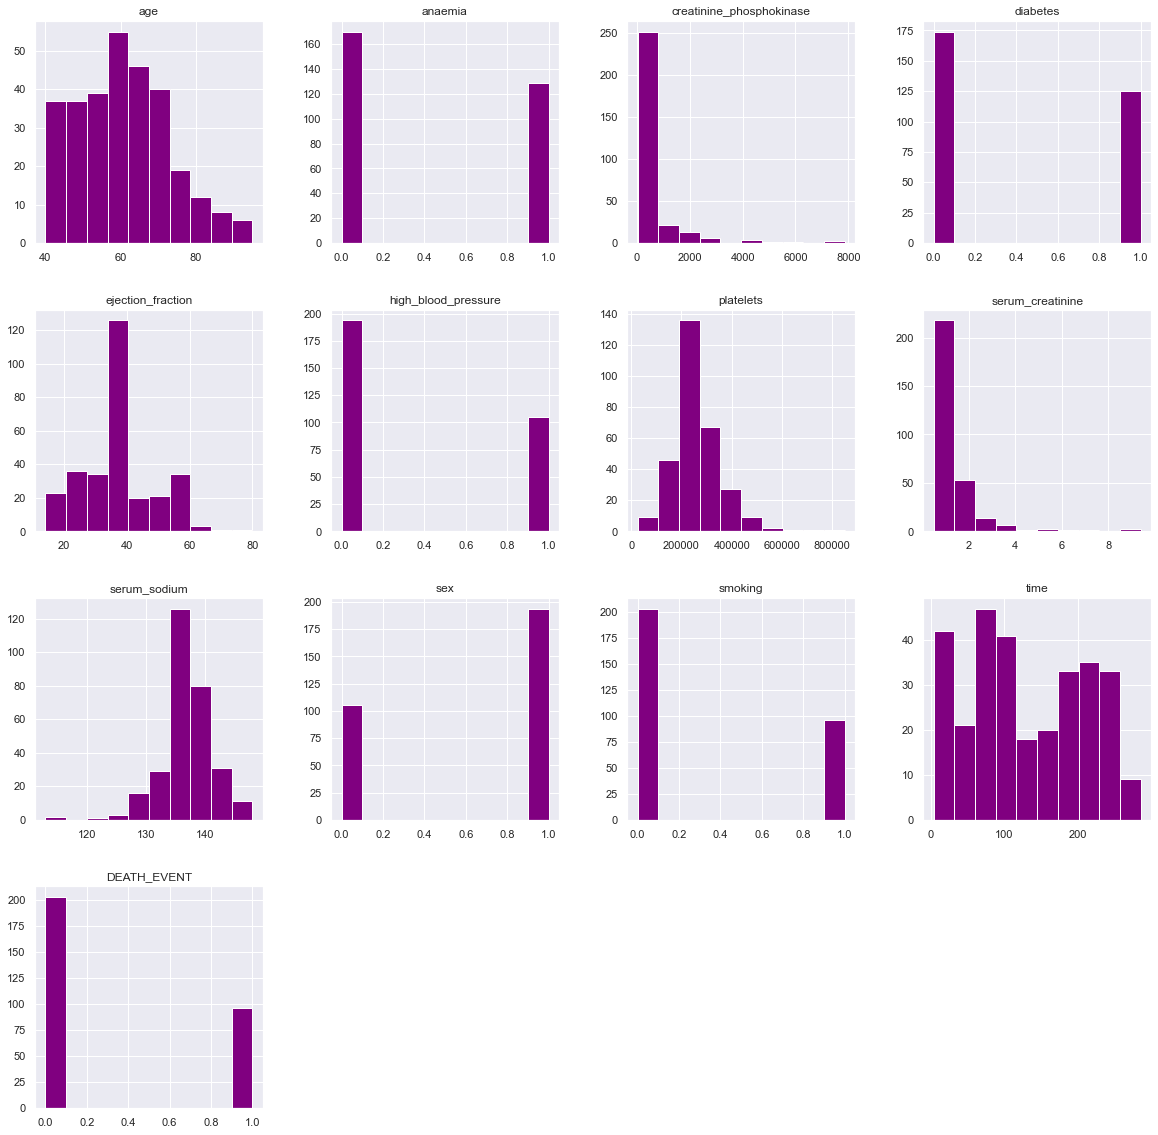

In [32]:
sns.set(style='darkgrid',rc={'figure.figsize':(20,20)})
heart_failure.hist(color='purple');

In [33]:
# verificando qual a idade geralmente acontece

px.histogram(heart_failure,x='age',color='DEATH_EVENT')

In [34]:
diabetes = []
diabete_bool = heart_failure['diabetes'].values
for i in range(0,heart_failure.shape[0]):
  if diabete_bool[i] == 0:
    diabetes.append('sim')
  else:
    diabetes.append('não')

In [35]:
px.histogram(heart_failure,x=diabetes,color='DEATH_EVENT')

farei a predição sem nenhuma alteração para verificar como fica os resultados

In [36]:
x = heart_failure.drop(['DEATH_EVENT'],axis=1).values
y = heart_failure.DEATH_EVENT.values

# normalização dos dados
x_std = StandardScaler().fit_transform(x)

In [37]:
# Separando os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_std,y,test_size=0.3,random_state=10)


In [38]:
lg = LogisticRegression()
lg.fit(x_treino,y_treino)
rf = RandomForestClassifier()
rf.fit(x_treino,y_treino)
svm = SVC()
svm.fit(x_treino,y_treino)
naive_b = GaussianNB()
naive_b.fit(x_treino,y_treino)

GaussianNB()

In [39]:
y_pred_lg = lg.predict(x_teste)
y_pred_rf = rf.predict(x_teste)
y_pred_na = naive_b.predict(x_teste)
y_pred_svm = svm.predict(x_teste)

In [40]:
print('resutados regressão logistica')
print(confusion_matrix(y_teste,y_pred_lg))
print('-'*20)
print(classification_report(y_teste,y_pred_lg))

resutados regressão logistica
[[49 12]
 [ 8 21]]
--------------------
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        61
           1       0.64      0.72      0.68        29

    accuracy                           0.78        90
   macro avg       0.75      0.76      0.75        90
weighted avg       0.79      0.78      0.78        90



In [41]:
print('resutados random forest')
print(confusion_matrix(y_teste,y_pred_rf))
print('-'*20)
print(classification_report(y_teste,y_pred_rf))

resutados random forest
[[54  7]
 [ 7 22]]
--------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        61
           1       0.76      0.76      0.76        29

    accuracy                           0.84        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.84      0.84      0.84        90



In [42]:
print('resutados svm')
print(confusion_matrix(y_teste,y_pred_svm))
print('-'*20)
print(classification_report(y_teste,y_pred_svm))

resutados svm
[[49 12]
 [10 19]]
--------------------
              precision    recall  f1-score   support

           0       0.83      0.80      0.82        61
           1       0.61      0.66      0.63        29

    accuracy                           0.76        90
   macro avg       0.72      0.73      0.72        90
weighted avg       0.76      0.76      0.76        90



In [43]:
print('resutados naive bayes')
print(confusion_matrix(y_teste,y_pred_na))
print('-'*20)
print(classification_report(y_teste,y_pred_na))

resutados naive bayes
[[52  9]
 [11 18]]
--------------------
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        61
           1       0.67      0.62      0.64        29

    accuracy                           0.78        90
   macro avg       0.75      0.74      0.74        90
weighted avg       0.77      0.78      0.78        90



Acredito que por ter poucas informações sobre quem morre e mais do que não morreu deve esta enviesando os modelos, talvez tirar e deixar os dois mais ou menos igual deve deixar os dados menos enviesado.


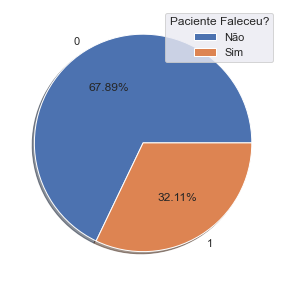

In [44]:
plt.figure(figsize=(10,5))
plt.pie(heart_failure['DEATH_EVENT'].value_counts(),shadow=True,
        labels=heart_failure['DEATH_EVENT'].value_counts().index,
        autopct='%1.2f%%')
plt.gca().legend(('Não','Sim'),title='Paciente Faleceu?');

fazendo o undersampling para dexar o modelo menos enviesado

In [45]:
from imblearn.under_sampling import RandomUnderSampler
nm = RandomUnderSampler(random_state = 43)

x_nm, y_nm = nm.fit_resample(x, y)

feito o undersampling, agora vamos jogar no modelo para verificar o desempenho do mesmo 

In [46]:
x_nm_std = StandardScaler().fit_transform(x_nm)

In [47]:
x_nm_treino, x_nm_teste, y_nm_treino, y_nm_teste = train_test_split(x_std,y,test_size=0.3,random_state=10)

In [48]:
logi_re = LogisticRegression()
naive_ba = GaussianNB()
random_f = RandomForestClassifier()
svm2 = SVC()
logi_re.fit(x_nm_treino,y_nm_treino)
naive_ba.fit(x_nm_treino,y_nm_treino)
random_f.fit(x_nm_treino,y_nm_treino)
svm2.fit(x_nm_treino,y_nm_treino)

SVC()

In [49]:
y_pred_lg2 = logi_re.predict(x_nm_teste)
y_pred_na2 = naive_ba.predict(x_nm_teste)
y_pred_rf2 = random_f.predict(x_nm_teste)
y_pred_svm2 = svm2.predict(x_nm_teste)

In [70]:
print(confusion_matrix(y_nm_teste,y_pred_lg2))
print(classification_report(y_nm_teste,y_pred_lg2))
print('sem alteração alguma')
print(classification_report(y_teste,y_pred_lg))


[[49 12]
 [ 8 21]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        61
           1       0.64      0.72      0.68        29

    accuracy                           0.78        90
   macro avg       0.75      0.76      0.75        90
weighted avg       0.79      0.78      0.78        90

sem alteração alguma
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        61
           1       0.64      0.72      0.68        29

    accuracy                           0.78        90
   macro avg       0.75      0.76      0.75        90
weighted avg       0.79      0.78      0.78        90



In [51]:
print(confusion_matrix(y_nm_teste,y_pred_na2))
print(classification_report(y_nm_teste,y_pred_na2))

[[52  9]
 [11 18]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        61
           1       0.67      0.62      0.64        29

    accuracy                           0.78        90
   macro avg       0.75      0.74      0.74        90
weighted avg       0.77      0.78      0.78        90



separando até um certo numero de linhas (100 aproximadamente)

In [52]:
cla_0 = heart_failure[heart_failure['DEATH_EVENT']==0]
cla_1 = heart_failure[heart_failure['DEATH_EVENT']==1]

In [53]:
print(cla_0.shape)
print(cla_1.shape)


(203, 13)
(96, 13)


In [55]:
cla_0 = cla_0[0:100]


In [56]:
heart_failure_al = cla_0.append(cla_1)

/tmp/ipykernel_16022/458376862.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [57]:
heart_failure_al.shape

(196, 13)

In [58]:
xn = heart_failure_al.drop(['DEATH_EVENT'],axis=1).values
yn = heart_failure_al.DEATH_EVENT

In [59]:
xn_std = StandardScaler().fit_transform(xn)

In [60]:
xn_treino,xn_teste,yn_treino,yn_teste = train_test_split(xn_std,yn,test_size=0.3,random_state=10)

In [61]:
logi_re2 = LogisticRegression()
naive_ba2 = GaussianNB()
random_f2 = RandomForestClassifier()
svm3 = SVC()
logi_re2.fit(xn_treino,yn_treino)
naive_ba2.fit(xn_treino,yn_treino)
random_f2.fit(xn_treino,yn_treino)
svm3.fit(xn_treino,yn_treino)

SVC()

In [64]:
y_pred_lg3 = logi_re2.predict(xn_teste)
y_pred_na3 = naive_ba2.predict(xn_teste)
y_pred_rf3 = random_f2.predict(xn_teste)
y_pred_svm3 = svm3.predict(xn_teste)

In [69]:
print(confusion_matrix(yn_teste,y_pred_lg3))
print(classification_report(yn_teste,y_pred_lg3))
print('-'*40)
print('sem alteração alguma')
print(classification_report(y_teste,y_pred_lg))

[[26  9]
 [ 6 18]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.78        35
           1       0.67      0.75      0.71        24

    accuracy                           0.75        59
   macro avg       0.74      0.75      0.74        59
weighted avg       0.75      0.75      0.75        59

----------------------------------------
sem alteração alguma
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        61
           1       0.64      0.72      0.68        29

    accuracy                           0.78        90
   macro avg       0.75      0.76      0.75        90
weighted avg       0.79      0.78      0.78        90



In [71]:
print(confusion_matrix(yn_teste,y_pred_rf3))
print(classification_report(yn_teste,y_pred_rf3))
print('sem alteração alguma')
print(classification_report(y_teste,y_pred_rf))

[[30  5]
 [ 1 23]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        35
           1       0.82      0.96      0.88        24

    accuracy                           0.90        59
   macro avg       0.89      0.91      0.90        59
weighted avg       0.91      0.90      0.90        59

sem alteração alguma
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        61
           1       0.76      0.76      0.76        29

    accuracy                           0.84        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.84      0.84      0.84        90



In [72]:
print(confusion_matrix(yn_teste,y_pred_na3))
print(classification_report(yn_teste,y_pred_na3))
print('sem alteração alguma')
print(classification_report(y_teste,y_pred_na))

[[31  4]
 [ 6 18]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        35
           1       0.82      0.75      0.78        24

    accuracy                           0.83        59
   macro avg       0.83      0.82      0.82        59
weighted avg       0.83      0.83      0.83        59

sem alteração alguma
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        61
           1       0.67      0.62      0.64        29

    accuracy                           0.78        90
   macro avg       0.75      0.74      0.74        90
weighted avg       0.77      0.78      0.78        90



In [73]:
print(confusion_matrix(yn_teste,y_pred_svm3))
print(classification_report(yn_teste,y_pred_svm3))
print('sem alteração alguma')
print(classification_report(y_teste,y_pred_svm))

[[28  7]
 [ 3 21]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        35
           1       0.75      0.88      0.81        24

    accuracy                           0.83        59
   macro avg       0.83      0.84      0.83        59
weighted avg       0.84      0.83      0.83        59

sem alteração alguma
              precision    recall  f1-score   support

           0       0.83      0.80      0.82        61
           1       0.61      0.66      0.63        29

    accuracy                           0.76        90
   macro avg       0.72      0.73      0.72        90
weighted avg       0.76      0.76      0.76        90



podemos ver q teve um pouco de aumento, mas ainda assim podemos ver que o modelo está enviesado para o 0, então apesar que o random forest e naive bayes terem aumentado, mas ainda precisaria de mais dados do 1 para ter uma boa perfomace